#SAM HOUSTON NATIONAL FOREST HUNTING DATA 2022

* day= day of the month
* month = month the deer was present
* time_of_day = the 30 minute increment that the deer was present
* deer = type of deer
* actual_temp = the temperature at the time the deer was present
* high_temp = the high temperature for that date
* low_temp = the low temperature for that date
* precipitation= the amount of precipitation

##What information from our 2022 October and November hunting season can we use to help predict the best times to hunt in Fall 2023?


##Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Personal Projects/SHNF_updated.csv')

In [ ]:
data.head()

,day,month,time_of_day,deer,actual_temp,high_temp,low_temp,points,precipitation
0,14,October,7:30-8:00 PM,7pt no Left G3,75,85,60,7,0.00
1,16,October,7:00-7:30 PM,7pt no Left G3,86,90,66,7,0.00
2,18,October,3:00-3:30 AM,8pt small G3s,48,71,48,8,0.15
3,21,October,12:00-12:30 AM,Large 8pt,62,80,51,8,0.00
4,21,October,4:00-4:30 AM,Large 8pt,57,80,51,8,0.00


In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
day,39.0,18.358974,8.901470,1.0,12.5,21.0,26.0,31.00
actual_temp,39.0,59.846154,14.077863,32.0,48.5,61.0,69.5,86.00
high_temp,39.0,71.307692,13.256883,44.0,67.5,74.0,82.5,90.00
low_temp,39.0,50.538462,9.380400,32.0,47.5,51.0,56.0,66.00
points,39.0,6.820513,1.998312,1.0,6.0,8.0,8.0,12.00
precipitation,39.0,0.106667,0.319336,0.0,0.0,0.0,0.0,1.82


* The average high temperature was 71 degrees and the average low temperature was 50 degrees during October and November
* The average actual temp was 60 degrees with a minimum of 32 degrees and a max of 86 degrees when deer are present
* The points a=on the deer range from 1 to 12 with the average being about 7 points.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            39 non-null     int64  
 1   month          39 non-null     object 
 2   time_of_day    39 non-null     object 
 3   deer           39 non-null     object 
 4   actual_temp    39 non-null     int64  
 5   high_temp      39 non-null     int64  
 6   low_temp       39 non-null     int64  
 7   points         39 non-null     int64  
 8   precipitation  39 non-null     float64
dtypes: float64(1), int64(5), object(3)
memory usage: 2.9+ KB


In [ ]:
data.shape

(39, 9)

* There are 39 rows and 9 columns of data

In [ ]:
data.isnull().sum()

day              0
month            0
time_of_day      0
deer             0
actual_temp      0
high_temp        0
low_temp         0
points           0
precipitation    0
dtype: int64

* There are no missing values

#Graphs

In [ ]:
#define barplot
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

###**Time of Day**

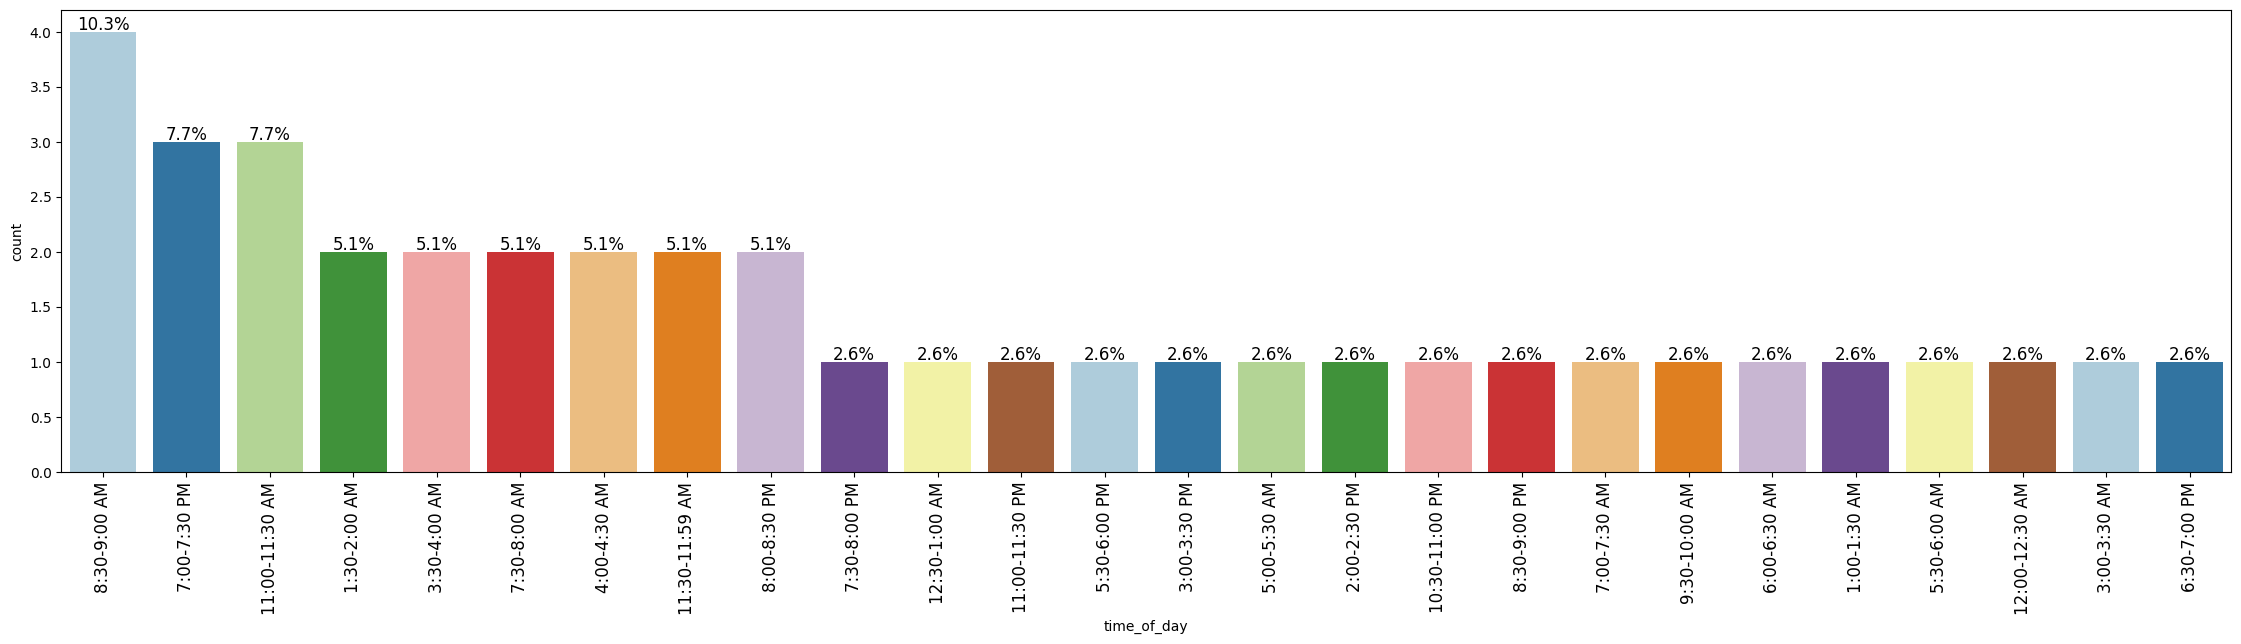

In [ ]:
labeled_barplot(data, 'time_of_day', perc=True)

Most common times deer are present
1. 8:30-9:00 AM
2. 11:00-11:30 AM
3. 7-7:30 PM

###**Most Common Deer**

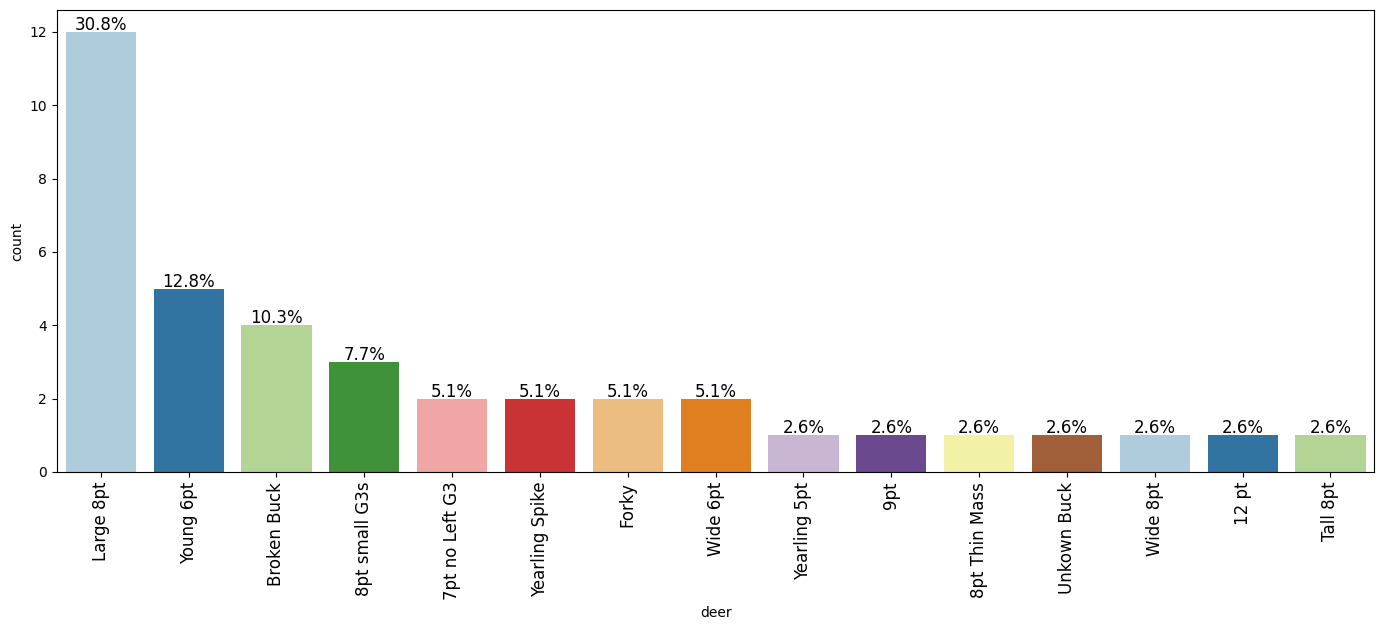

In [ ]:
labeled_barplot(data, 'deer', perc=True)

* There are 15 bucks.

The most common deer:
1. Large 8pt
2. Young 6pt
3. Broken Buck
4. 8pt Small G3s
5. Yearling Spike, Forkey, and Wide 6pt

###Temperature

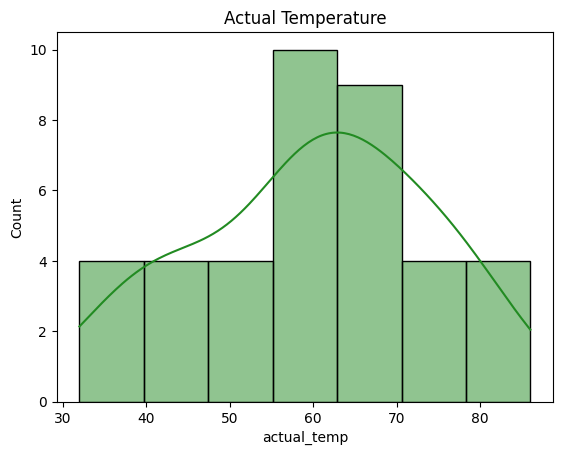

In [ ]:
sns.histplot(data=data, x='actual_temp', kde=True, color='forestgreen')
plt.title('Actual Temperature')
plt.show()

* The most common temperature when deer are present is between 55 degrees and 70 degrees.

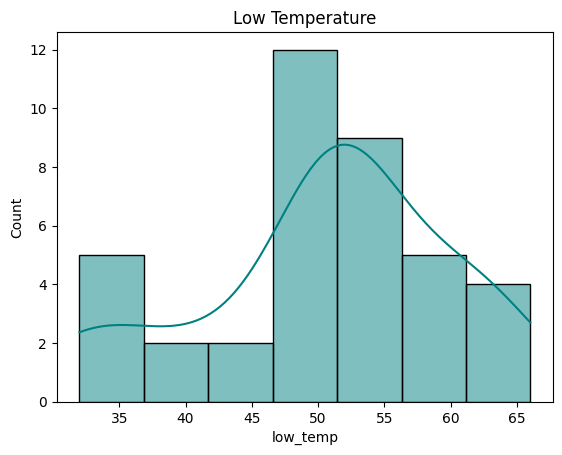

In [ ]:
sns.histplot(data=data, x='low_temp', kde=True, color='teal')
plt.title('Low Temperature')
plt.show()

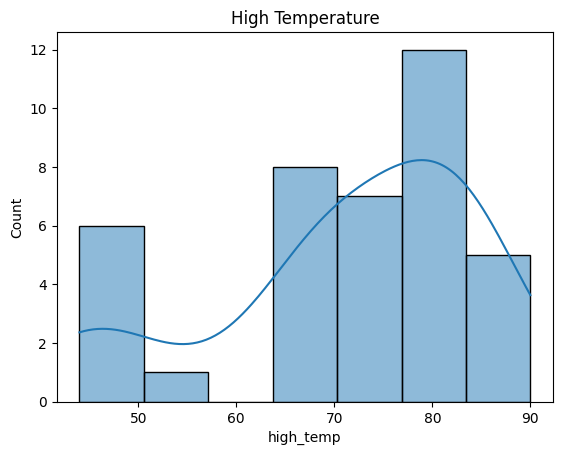

In [ ]:
sns.histplot(data=data, x='high_temp', kde=True)
plt.title('High Temperature')
plt.show()

**Actual Temperature below 60 degrees**

In [ ]:
temp_below_60 = data[data['actual_temp']<60]
print(temp_below_60)

    day     month     time_of_day           deer  actual_temp  high_temp  \
2    18   October    3:00-3:30 AM  8pt small G3s           48         71   
4    21   October    4:00-4:30 AM      Large 8pt           57         80   
10   26   October    1:00-1:30 AM    Broken Buck           39         68   
11   26   October    8:30-9:00 AM      Young 6pt           41         68   
14   28   October    6:00-6:30 AM      Large 8pt           57         75   
21    1  November    8:30-9:00 PM      Large 8pt           57         74   
23    5  November    3:30-4:00 AM      Large 8pt           56         84   
24    5  November    7:00-7:30 AM          Forky           54         84   
29   12  November    8:00-8:30 PM      Large 8pt           48         78   
30   13  November    1:30-2:00 AM       Wide 8pt           39         46   
31   13  November  11:00-11:30 PM       Wide 6pt           49         46   
32   19  November    3:00-3:30 PM      Large 8pt           41         56   
33   20  Nov

**Actual Temperature 60 degrees or above**

In [ ]:
temp_at60_above = data[data['actual_temp']>=60]
print(temp_at60_above)

    day     month     time_of_day            deer  actual_temp  high_temp  \
0    14   October    7:30-8:00 PM  7pt no Left G3           75         85   
1    16   October    7:00-7:30 PM  7pt no Left G3           86         90   
3    21   October  12:00-12:30 AM       Large 8pt           62         80   
5    21   October  11:30-11:59 AM       Young 6pt           79         80   
6    21   October  11:30-11:59 AM  Yearling Spike           79         80   
7    22   October    8:00-8:30 PM   8pt small G3s           76         83   
8    23   October    4:00-4:30 AM       Large 8pt           68         83   
9    23   October    5:30-6:00 AM     Broken Buck           70         83   
12   26   October  11:00-11:30 AM  Yearling Spike           68         68   
13   26   October  11:00-11:30 AM       Young 6pt           68         68   
15   28   October    7:00-7:30 PM       Large 8pt           60         75   
16   29   October  11:00-11:30 AM    Yearling 5pt           63         64   

**Deer vs Actual Temp by Month**

<Figure size 1500x700 with 0 Axes>

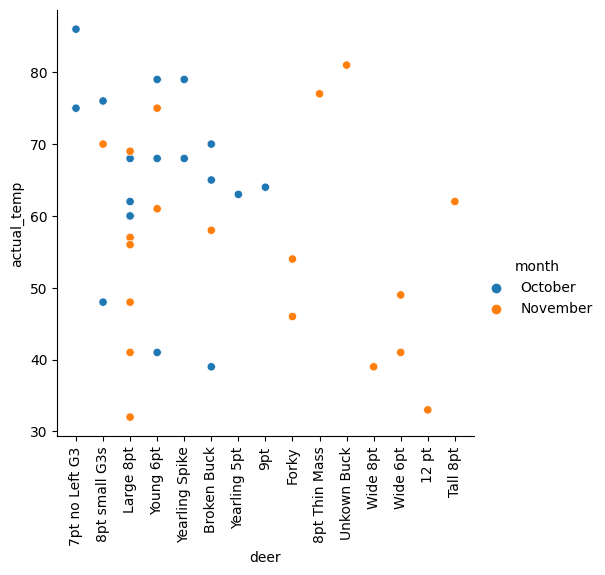

In [ ]:
plt.figure(figsize=(15,7))
sns.relplot(data=data, x="deer", y="actual_temp", hue="month")
plt.xticks(rotation=90)
plt.show()

*Observations*
* We can observe that the 7pt no left G3 buck was only around in October with higher temps.
* The Large 8pt buck showed up in OCtober and November when temps ranged from 30-70 degrees.


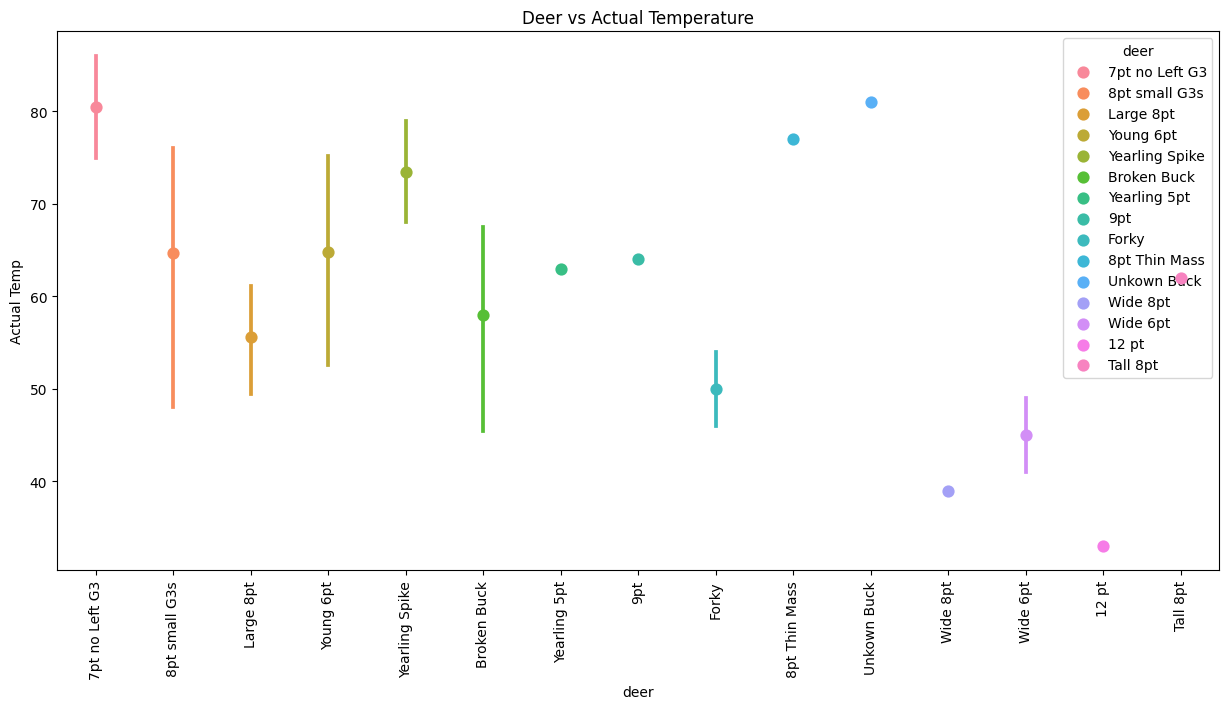

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(data=data, y='actual_temp', x='deer', hue='deer')
plt.xticks(rotation=90)
plt.title('Deer vs Actual Temperature')
plt.ylabel('Actual Temp')
plt.show()

###Points

**Number of Points**

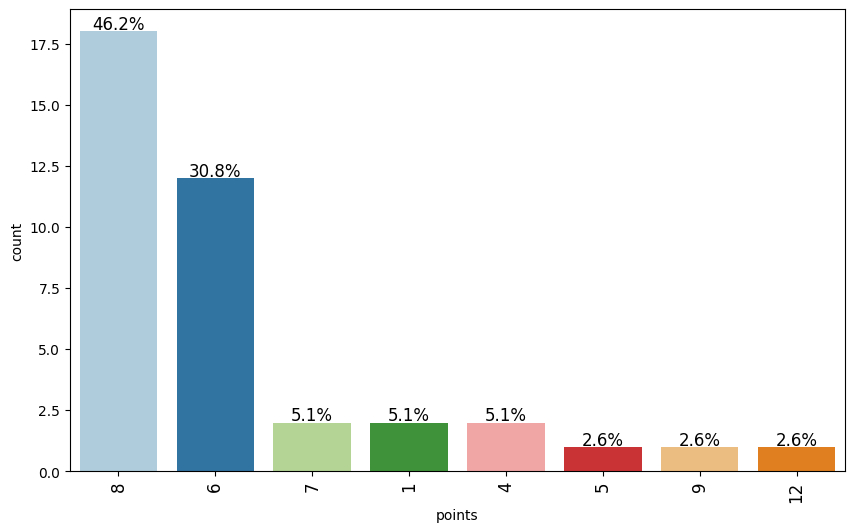

In [ ]:
labeled_barplot(data, 'points', perc=True)

* 46.2% of the deer have 8 points
* 30.8% of the deer have 6 points
* 82.1% of the deer have between 6 and 8 points

###Information about the 4 most common deer

**Large 8pt Buck**

In [ ]:
desired_deer = 'Large 8pt'
desired_deer_data = data[data['deer'] == desired_deer]
print(desired_deer_data)

    day     month     time_of_day       deer  actual_temp  high_temp  \
3    21   October  12:00-12:30 AM  Large 8pt           62         80   
4    21   October    4:00-4:30 AM  Large 8pt           57         80   
8    23   October    4:00-4:30 AM  Large 8pt           68         83   
14   28   October    6:00-6:30 AM  Large 8pt           57         75   
15   28   October    7:00-7:30 PM  Large 8pt           60         75   
17   29   October    7:00-7:30 PM  Large 8pt           60         64   
21    1  November    8:30-9:00 PM  Large 8pt           57         74   
23    5  November    3:30-4:00 AM  Large 8pt           56         84   
25    5  November    5:30-6:00 PM  Large 8pt           69         84   
29   12  November    8:00-8:30 PM  Large 8pt           48         78   
32   19  November    3:00-3:30 PM  Large 8pt           41         56   
34   20  November    7:30-8:00 AM  Large 8pt           32         44   

    low_temp  points  precipitation  
3         51       8     

**Young 6pt**

In [ ]:
print(data[data['deer'] == 'Young 6pt'])

    day     month     time_of_day       deer  actual_temp  high_temp  \
5    21   October  11:30-11:59 AM  Young 6pt           79         80   
11   26   October    8:30-9:00 AM  Young 6pt           41         68   
13   26   October  11:00-11:30 AM  Young 6pt           68         68   
20    1  November    8:30-9:00 AM  Young 6pt           61         74   
22    4  November    7:30-8:00 AM  Young 6pt           75         81   

    low_temp  points  precipitation  
5         51       6            0.0  
11        51       6            0.0  
13        51       6            0.0  
20        56       6            0.0  
22        64       6            0.0  


**Broken Buck**

In [ ]:
print(data[data['deer'] == 'Broken Buck'])

    day     month    time_of_day         deer  actual_temp  high_temp  \
9    23   October   5:30-6:00 AM  Broken Buck           70         83   
10   26   October   1:00-1:30 AM  Broken Buck           39         68   
19   31   October  9:30-10:00 AM  Broken Buck           65         71   
36   22  November   3:30-4:00 AM  Broken Buck           58         44   

    low_temp  points  precipitation  
9         61       6           0.00  
10        51       6           0.00  
19        52       6           0.00  
36        41       6           0.41  


**8pt Small G3s**

In [ ]:
print(data[data['deer'] == '8pt small G3s'])

    day     month   time_of_day           deer  actual_temp  high_temp  \
2    18   October  3:00-3:30 AM  8pt small G3s           48         71   
7    22   October  8:00-8:30 PM  8pt small G3s           76         83   
28    8  November  1:30-2:00 AM  8pt small G3s           70         83   

    low_temp  points  precipitation  
2         48       8           0.15  
7         60       8           0.00  
28        63       8           0.00  


###**Month**

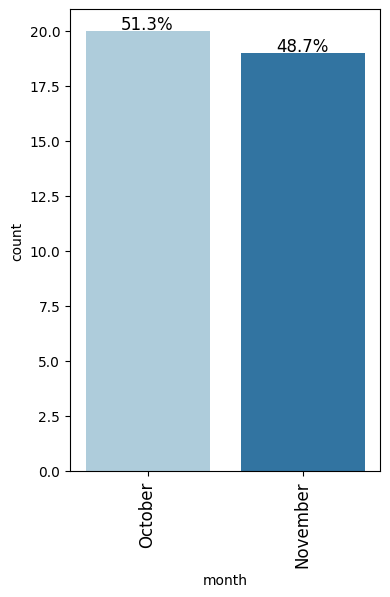

In [ ]:
labeled_barplot(data, 'month', perc=True)

* 51.3% of the deer showed up in October vs 48.7% in November

**Deer vs Month**

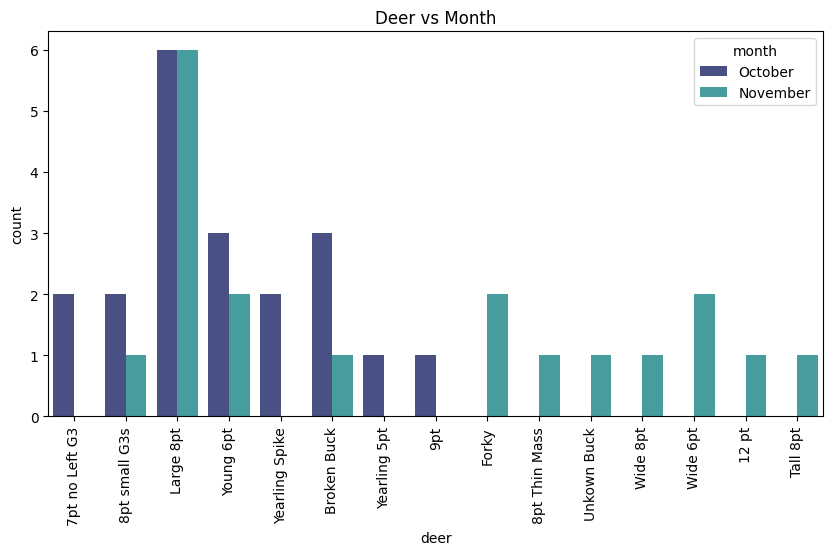

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='deer', hue='month', palette='mako')
plt.xticks(rotation=90)
plt.title('Deer vs Month')
plt.show()

Only October deer:
* 7pt no Left G3, Yearling Spike, Yearling 5pt, 9pt

Only November deer:
* Forky, 8pt Thin Mass, Uknown Buck, Wide 8pt, Wide 6pt, 12pt, Tall 8pt

October and November deer:
* 8pt Small G3s, Large 8pt, Young 6pt, Broken Buck

**Day of the month**

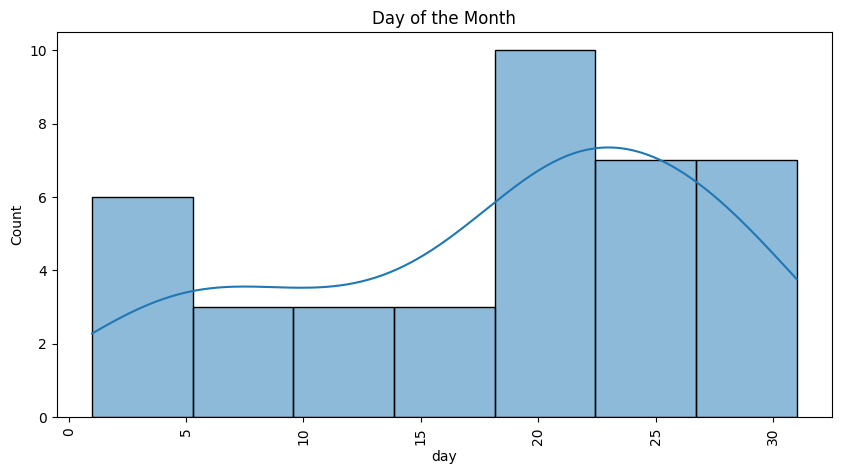

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="day", kde=True)
plt.xticks(rotation=90)
plt.title('Day of the Month')
plt.show()


* Deer tend to show up more during the second half of the month or within the first 5 days of the month
* Deer were most commonly present between the 18th and 31st of the month.

**Points vs Month**

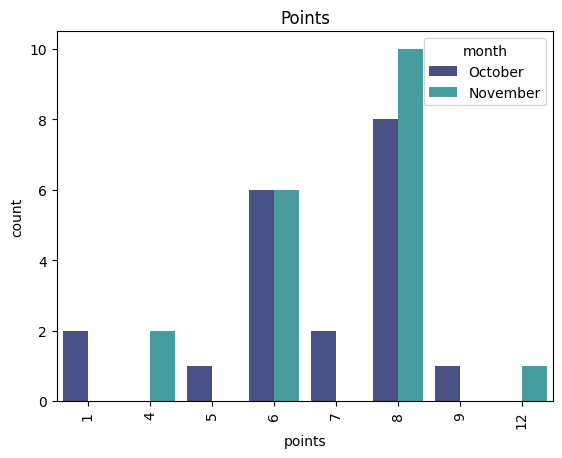

In [ ]:
sns.countplot(data=data, x="points", hue='month', palette='mako')
plt.xticks(rotation=90)
plt.title('Points')
plt.show()

###**Bucks with 6 or less points**

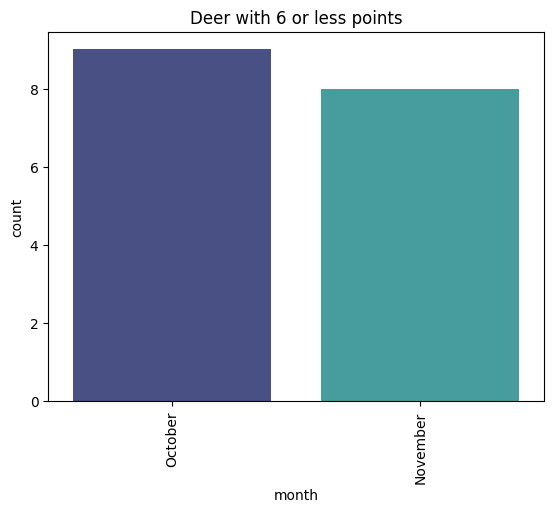

In [ ]:
sns.countplot(data=data[data['points'] < 7], x="month", palette='mako')
plt.xticks(rotation=90)
plt.title('Deer with 6 or less points')
plt.show()

In [ ]:
points_lessthan_7 = data[data['points'] < 7]
print(points_lessthan_7)

    day     month     time_of_day            deer  actual_temp  high_temp  \
5    21   October  11:30-11:59 AM       Young 6pt           79         80   
6    21   October  11:30-11:59 AM  Yearling Spike           79         80   
9    23   October    5:30-6:00 AM     Broken Buck           70         83   
10   26   October    1:00-1:30 AM     Broken Buck           39         68   
11   26   October    8:30-9:00 AM       Young 6pt           41         68   
12   26   October  11:00-11:30 AM  Yearling Spike           68         68   
13   26   October  11:00-11:30 AM       Young 6pt           68         68   
16   29   October  11:00-11:30 AM    Yearling 5pt           63         64   
19   31   October   9:30-10:00 AM     Broken Buck           65         71   
20    1  November    8:30-9:00 AM       Young 6pt           61         74   
22    4  November    7:30-8:00 AM       Young 6pt           75         81   
24    5  November    7:00-7:30 AM           Forky           54         84   

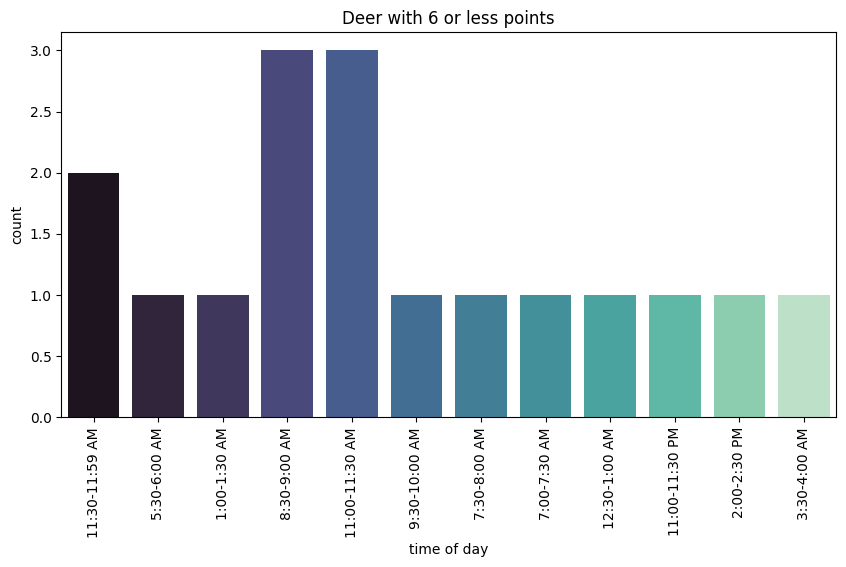

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['points'] < 7], x="time_of_day", palette='mako')
plt.xticks(rotation=90)
plt.xlabel('time of day')
plt.title('Deer with 6 or less points')
plt.show()

*Observations*
* Bucks with 6 or less points tend to make their appearance at 8:30-9:00AM and 11:00-11:59AM
* They seem to like the morning/mid-morning to make their appearance

###**Bucks with 7 or more points**

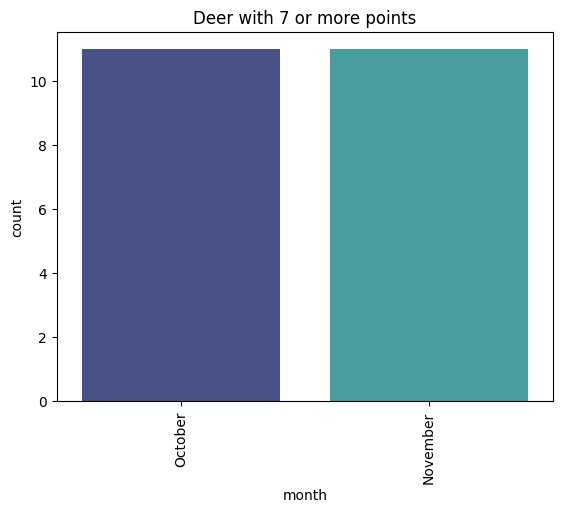

In [ ]:
sns.countplot(data=data[data['points'] > 6], x="month", palette='mako')
plt.xticks(rotation=90)
plt.title('Deer with 7 or more points')
plt.show()

In [ ]:
points_morethan_6 = data[data['points'] > 6]
print(points_morethan_6)

    day     month     time_of_day            deer  actual_temp  high_temp  \
0    14   October    7:30-8:00 PM  7pt no Left G3           75         85   
1    16   October    7:00-7:30 PM  7pt no Left G3           86         90   
2    18   October    3:00-3:30 AM   8pt small G3s           48         71   
3    21   October  12:00-12:30 AM       Large 8pt           62         80   
4    21   October    4:00-4:30 AM       Large 8pt           57         80   
7    22   October    8:00-8:30 PM   8pt small G3s           76         83   
8    23   October    4:00-4:30 AM       Large 8pt           68         83   
14   28   October    6:00-6:30 AM       Large 8pt           57         75   
15   28   October    7:00-7:30 PM       Large 8pt           60         75   
17   29   October    7:00-7:30 PM       Large 8pt           60         64   
18   31   October    8:30-9:00 AM             9pt           64         71   
21    1  November    8:30-9:00 PM       Large 8pt           57         74   

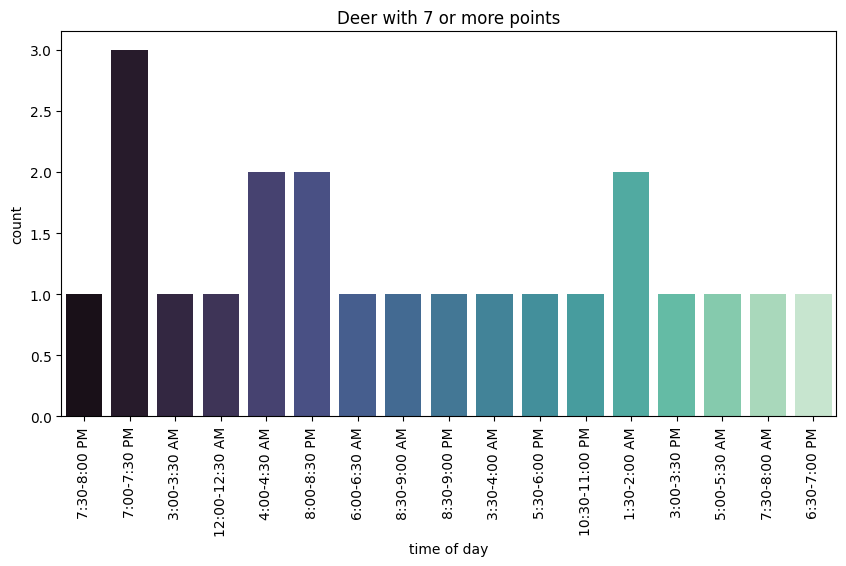

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['points'] > 6], x="time_of_day", palette='mako')
plt.xticks(rotation=90)
plt.title('Deer with 7 or more points')
plt.xlabel('time of day')
plt.show()

*Observations*

The top times of the day when bucks with 7 or more points are around are:
 * 7:00-7:30PM
 * 4:00-4:30AM, 8:00-8:30PM, 1:30-2:00AM
They seem to prefer the evening and middle of the night appearances

###Precipitation

**Information when precipication was > 0**

In [ ]:
precipitation_deer = data[data['precipitation'] > 0]
print(precipitation_deer)

    day     month     time_of_day           deer  actual_temp  high_temp  \
2    18   October    3:00-3:30 AM  8pt small G3s           48         71   
14   28   October    6:00-6:30 AM      Large 8pt           57         75   
16   29   October  11:00-11:30 AM   Yearling 5pt           63         64   
23    5  November    3:30-4:00 AM      Large 8pt           56         84   
29   12  November    8:00-8:30 PM      Large 8pt           48         78   
33   20  November    5:00-5:30 AM          12 pt           33         44   
35   21  November    2:00-2:30 PM          Forky           46         50   
36   22  November    3:30-4:00 AM    Broken Buck           58         44   

    low_temp  points  precipitation  
2         48       8           0.15  
14        51       8           0.15  
16        54       5           0.61  
23        52       8           0.42  
29        37       8           1.82  
33        32      12           0.48  
35        36       4           0.12  
36        4

* There were 8 days with precipitation during October and November

**Amount of precipitation for each deer**

In [ ]:
data.groupby("deer")["precipitation"].sum()

deer
12 pt             0.48
7pt no Left G3    0.00
8pt Thin Mass     0.00
8pt small G3s     0.15
9pt               0.00
Broken Buck       0.41
Forky             0.12
Large 8pt         2.39
Tall 8pt          0.00
Unkown Buck       0.00
Wide 6pt          0.00
Wide 8pt          0.00
Yearling 5pt      0.61
Yearling Spike    0.00
Young 6pt         0.00
Name: precipitation, dtype: float64

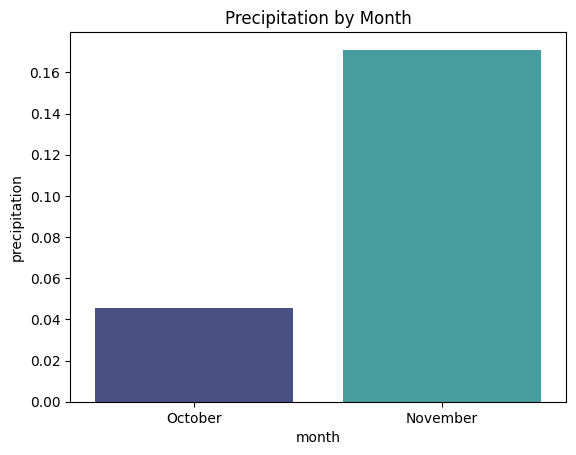

In [ ]:
sns.barplot(data=data, x='month', y='precipitation', palette='mako', errorbar=('ci',False))
plt.title('Precipitation by Month')
plt.show()

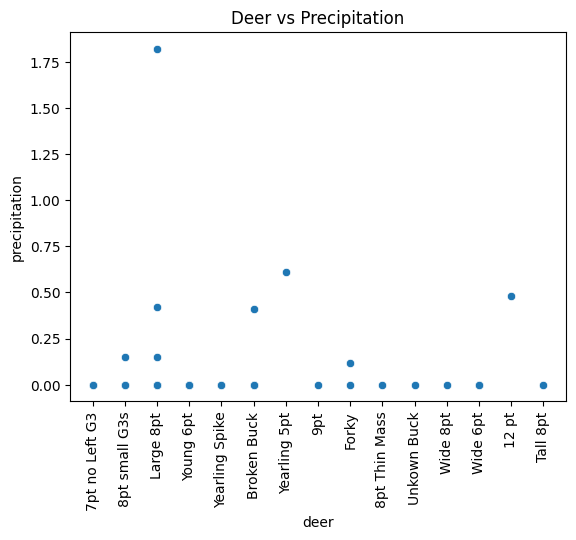

In [ ]:
sns.scatterplot(data=data, x='deer', y='precipitation')
plt.xticks(rotation=90)
plt.title('Deer vs Precipitation')
plt.show()

Precipitation Observations:
* Most deer were present when there was 0 inches of rainfall
*The Large 8pt did not mind being in the rainfall as it was present on days with alot of rain

# **Observations and Recommendations**
* There are 15 different types of deer
* Deer are most commonly present between 8:30-9:00AM, 7:00-7:30PM, and 11:00-11:30AM
* The most common deer present were: *Large 8pt, Young 6pt, Broken Buck, 8pt Small G3s, and Forkey*
* 46.2% of the deer have 8 points
* 30.8% of the deer have 6 points
* 82.1% of the deer have between 6 and 8 points
* Bucks with 6 or less points tend to make their appearance at 8:30-9:00AM and 11:00-11:59AM (They seem to like the morning/mid-morning to make their appearance)
* The top times of the day when bucks with 7 or more points are around are: 7:00-7:30PM, 4:00-4:30AM, 8:00-8:30PM, 1:30-2:00AM (They seem to prefer the evening and middle of the night appearances)
* 51.3% of the deer showed up in October vs 48.7% in November
* Deer often showed up in the second half of the month and the first few days of the month
* *Only October deer*: 7pt no Left G3, Yearling Spike, Yearling 5pt, 9pt
* *Only November deer*: Forky, 8pt Thin Mass, Uknown Buck, Wide 8pt, Wide 6pt, 12pt, Tall 8pt
* *October and November deer*: 8pt Small G3s, Large 8pt, Young 6pt, Broken Buck
* There were 8 days with precipitation
<br>

* We would reccomend the best hunting times to be 7AM-Noon and 7-8:30PM (depending on sunrise and sunset for the day)